## Exploratory Data Analysis Census Income Data Set 

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/census.csv")
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The datasets contains 32561 and 15 columns

In [3]:
print(df.shape)

(32561, 15)


Some processing to the name of the columns

In [4]:
df.columns

Index(['age', ' workclass', ' fnlgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [5]:
for column in df.columns:
    column = column.replace(" ", "")
    column = column.replace("-", "_")
    print(column)

age
workclass
fnlgt
education
education_num
marital_status
occupation
relationship
race
sex
capital_gain
capital_loss
hours_per_week
native_country
salary


In [6]:
def column_processing(column):
    column = column.replace(" ", "")
    column = column.replace("-", "_")
    return column
    
new_columns = map(column_processing, df.columns)
new_columns = list(new_columns)
print(new_columns)

['age', 'workclass', 'fnlgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']


In [7]:
df.columns = new_columns

Exploring the column data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking for null values

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlgt             0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

Exploring unbalanced target variable

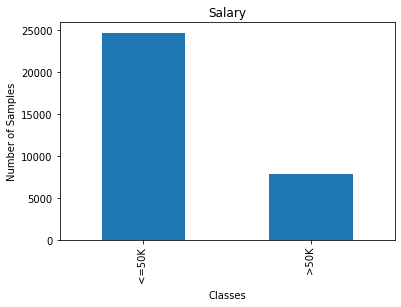

In [10]:
df.salary.value_counts().plot(kind="bar", title="Salary")
plt.xlabel("Classes")
plt.ylabel("Number of Samples");

Checking the distribution of predictors

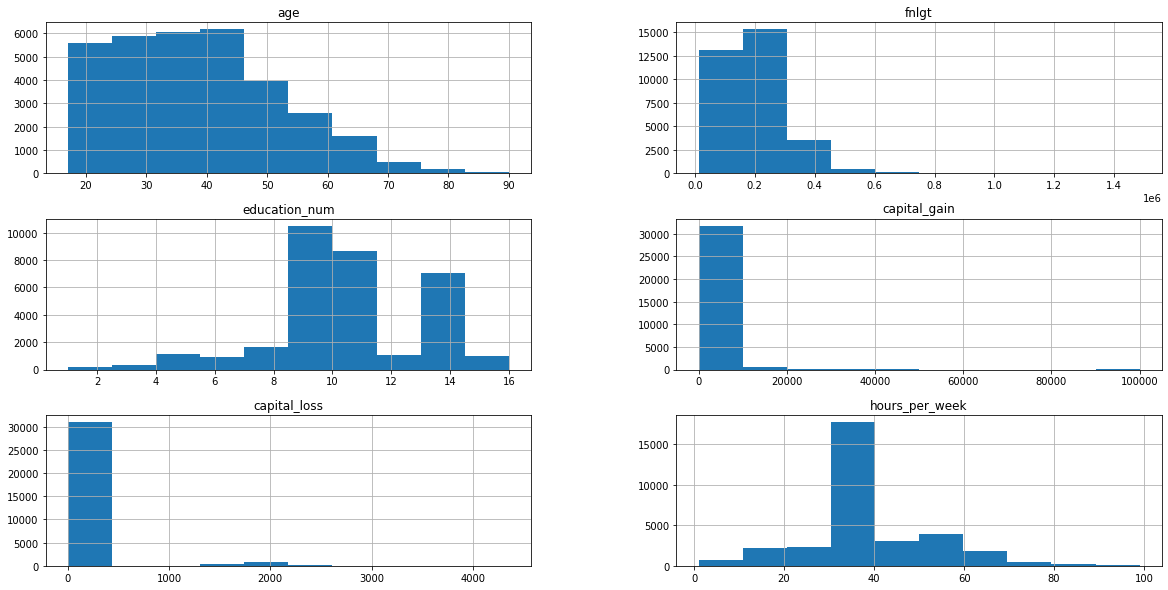

In [11]:
df.hist(figsize=(20, 10));

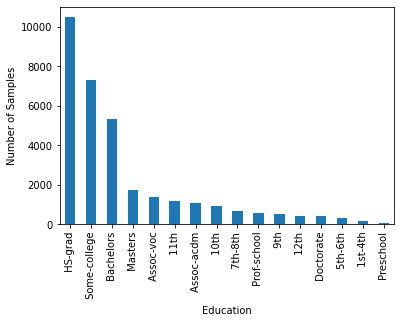

In [12]:
df.education.value_counts().plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Number of Samples");

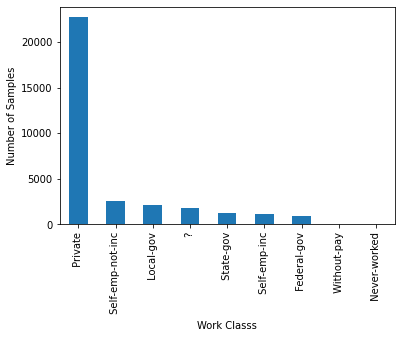

In [13]:
df.workclass.value_counts().plot(kind="bar")
plt.xlabel("Work Classs")
plt.ylabel("Number of Samples");

In [14]:
mask = df.workclass == " ?"
len(df[mask])

1836

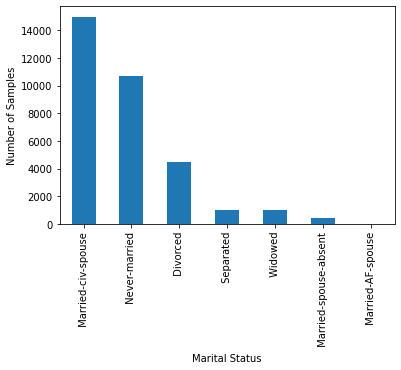

In [15]:
df.marital_status.value_counts().plot(kind="bar")
plt.xlabel("Marital Status")
plt.ylabel("Number of Samples");

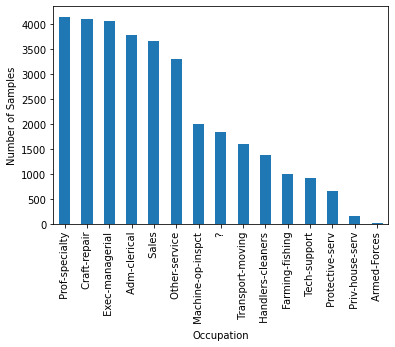

In [16]:
df.occupation.value_counts().plot(kind="bar")
plt.xlabel("Occupation")
plt.ylabel("Number of Samples");

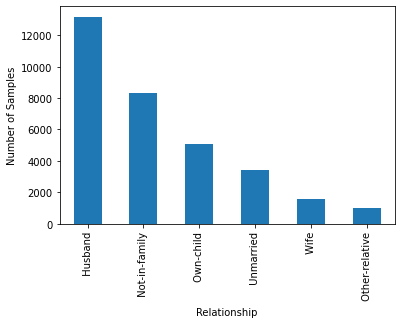

In [17]:
df.relationship.value_counts().plot(kind="bar")
plt.xlabel("Relationship")
plt.ylabel("Number of Samples");

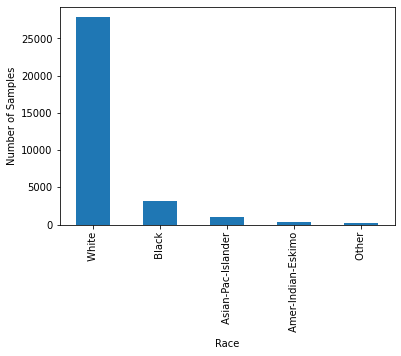

In [18]:
df.race.value_counts().plot(kind="bar")
plt.xlabel("Race")
plt.ylabel("Number of Samples");

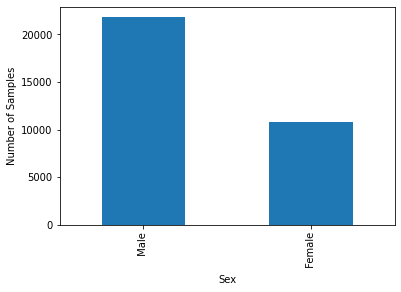

In [19]:
df.sex.value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Number of Samples");

In [20]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [21]:
mask = df.native_country == " ?"
len(df[mask])

583